## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [5]:
hdb_resale_od = r"E:\Documents\Personal Projects\Dashboard\HDB Resale Price\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv" 
df_hdb_resale_price = pd.read_csv(hdb_resale_od)

In [6]:
print(df_hdb_resale_price.head())

     month        town flat_type block        street_name storey_range  \
0  2017-01  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1  2017-01  ANG MO KIO    3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2  2017-01  ANG MO KIO    3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3  2017-01  ANG MO KIO    3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4  2017-01  ANG MO KIO    3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   

   floor_area_sqm      flat_model  lease_commence_date     remaining_lease  \
0            44.0        Improved                 1979  61 years 04 months   
1            67.0  New Generation                 1978  60 years 07 months   
2            67.0  New Generation                 1980  62 years 05 months   
3            68.0  New Generation                 1980   62 years 01 month   
4            67.0  New Generation                 1980  62 years 05 months   

   resale_price  
0      232000.0  
1      250000.0  
2      262000.0  
3      265000.

## View information on the Dataset

In [7]:
df_hdb_resale_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190827 entries, 0 to 190826
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                190827 non-null  object 
 1   town                 190827 non-null  object 
 2   flat_type            190827 non-null  object 
 3   block                190827 non-null  object 
 4   street_name          190827 non-null  object 
 5   storey_range         190827 non-null  object 
 6   floor_area_sqm       190827 non-null  float64
 7   flat_model           190827 non-null  object 
 8   lease_commence_date  190827 non-null  int64  
 9   remaining_lease      190827 non-null  object 
 10  resale_price         190827 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 16.0+ MB


In [8]:
df_hdb_resale_price.shape

(190827, 11)

In [9]:
df_hdb_resale_price.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


### Check if there null values

In [10]:
df_hdb_resale_price.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

### Check if there are duplicates value

In [11]:
duplicates = df_hdb_resale_price[df_hdb_resale_price.duplicated()]

#total count of duplicate rows in the DataFrame
print('Duplicates:', len(duplicates))

#print the duplicate rows
print(duplicates)

Duplicates: 292
          month          town flat_type block        street_name storey_range  \
243     2017-01   BUKIT MERAH    4 ROOM   106     HENDERSON CRES     07 TO 09   
305     2017-01  CENTRAL AREA    3 ROOM   271           QUEEN ST     16 TO 18   
510     2017-01   JURONG EAST    4 ROOM   265        TOH GUAN RD     04 TO 06   
591     2017-01   JURONG WEST    4 ROOM  337A       TAH CHING RD     19 TO 21   
672     2017-01     PASIR RIS    4 ROOM   753    PASIR RIS ST 71     01 TO 03   
...         ...           ...       ...   ...                ...          ...   
182040  2024-06       PUNGGOL    4 ROOM  671A   EDGEFIELD PLAINS     13 TO 15   
186918  2024-08       HOUGANG    4 ROOM  997A      BUANGKOK CRES     04 TO 06   
187517  2024-08       PUNGGOL    4 ROOM  220B        SUMANG LANE     07 TO 09   
187733  2024-08     SEMBAWANG    4 ROOM  508C  WELLINGTON CIRCLE     07 TO 09   
190121  2024-09      SENGKANG    3 ROOM  471C        FERNVALE ST     01 TO 03   

        flo

The duplicate check is applied to every row across all columns in the DataFrame. 

## Preparing the Dataset

### Remove the duplicate values and modify the original DataFrame

In [12]:
#creating a new DataFrame without duplicates while keeping the first occurence
df_hdb_resale_price_no_duplicates = df_hdb_resale_price.drop_duplicates(keep='first')

In [13]:
df_hdb_resale_price.shape

(190827, 11)

### Creating a new column; address by combining block and street_name

In [14]:
df_hdb_resale_price['address'] = df_hdb_resale_price['block'] + ' ' + df_hdb_resale_price['street_name']

In [15]:
print(df_hdb_resale_price)

          month        town  flat_type block        street_name storey_range  \
0       2017-01  ANG MO KIO     2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1       2017-01  ANG MO KIO     3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2       2017-01  ANG MO KIO     3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3       2017-01  ANG MO KIO     3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4       2017-01  ANG MO KIO     3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   
...         ...         ...        ...   ...                ...          ...   
190822  2024-09      YISHUN  EXECUTIVE   358     YISHUN RING RD     01 TO 03   
190823  2024-09      YISHUN  EXECUTIVE   606       YISHUN ST 61     01 TO 03   
190824  2024-09      YISHUN  EXECUTIVE   641       YISHUN ST 61     07 TO 09   
190825  2024-09      YISHUN  EXECUTIVE   606       YISHUN ST 61     13 TO 15   
190826  2024-09      YISHUN  EXECUTIVE   824       YISHUN ST 81     01 TO 03   

        floor_area_sqm      flat_model 

### Grouping the town by region

By referencing both the HDB website (https://www.hdb.gov.sg/about-us/history/hdb-towns-your-home) and https://www.propertyguru.com.sg/singapore-property-listing/hdb/kallang-whampoa, I categorize the towns by region. This classification will be beneficial for analyzing market trends and will help in understanding how different areas influence the housing market.

**Function for categorizing the town into different regions based on its name**

In [16]:
def get_region(town):
    # Define a dictionary mapping towns to their respective regions
    regions = {
        'CENTRAL REGION': ['BISHAN', 'BUKIT MERAH', 'GEYLANG', 'KALLANG', 
                           'MARINE PARADE', 'QUEENSTOWN', 'KALLANG/WHAMPOA', 
                           'BUKIT TIMAH', 'CENTRAL AREA', 'TOA PAYOH'],
        'EAST REGION': ['BEDOK', 'CHANGI', 'CHANGI BAY', 'PAYA LEBAR', 
                        'PASIR RIS', 'TAMPINES'],
        'NORTH REGION': ['MANDAI', 'LIM CHU KANG', 'SEMBAWANG', 'SIMPANG', 
                         'SUNGEI KADUT', 'WOODLANDS', 'YISHUN'],
        'NORTH-EAST REGION': ['ANG MO KIO', 'HOUGANG', 'PUNGGOL', 
                              'SELETAR', 'SENGKANG', 'SERANGOON'],
        'WEST REGION': ['BUKIT BATOK', 'BUKIT PANJANG', 'BOON LAY', 
                        'PIONEER', 'CHOA CHU KANG', 'CLEMENTI', 
                        'JURONG EAST', 'JURONG WEST', 'TENGAH', 'TUAS', 
                        'WESTERN ISLANDS', 'BENOI', 'GHIM MOH', 
                        'PANDAN GARDENS', 'JURONG ISLAND', 'KENT RIDGE', 
                        'NANYANG', 'PASIR LABA', 'TEBAN GARDENS', 
                        'TOH TUCK', 'TUAS SOUTH', 'WEST COAST']
    }
    
    # Normalize the town name to upper case for comparison
    town = town.upper()

    # Loop through the dictionary to find the region
    for region, towns in regions.items():
        if town in towns:
            return region
            
    return 'OTHER'

In [17]:
# Apply the function to the 'town' column and create a new 'region' column
df_hdb_resale_price['region'] = df_hdb_resale_price['town'].apply(get_region)

In [18]:
print(df_hdb_resale_price.head(20))

      month        town flat_type block        street_name storey_range  \
0   2017-01  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1   2017-01  ANG MO KIO    3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2   2017-01  ANG MO KIO    3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3   2017-01  ANG MO KIO    3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4   2017-01  ANG MO KIO    3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   
5   2017-01  ANG MO KIO    3 ROOM   150   ANG MO KIO AVE 5     01 TO 03   
6   2017-01  ANG MO KIO    3 ROOM   447  ANG MO KIO AVE 10     04 TO 06   
7   2017-01  ANG MO KIO    3 ROOM   218   ANG MO KIO AVE 1     04 TO 06   
8   2017-01  ANG MO KIO    3 ROOM   447  ANG MO KIO AVE 10     04 TO 06   
9   2017-01  ANG MO KIO    3 ROOM   571   ANG MO KIO AVE 3     01 TO 03   
10  2017-01  ANG MO KIO    3 ROOM   534  ANG MO KIO AVE 10     01 TO 03   
11  2017-01  ANG MO KIO    3 ROOM   233   ANG MO KIO AVE 3     10 TO 12   
12  2017-01  ANG MO KIO  

**Checking town**

In [19]:
town_name = 'BISHAN'
region = get_region(town_name)
print(f'The town {town_name} is in the {region}.')

The town BISHAN is in the CENTRAL REGION.


### Plotting charts

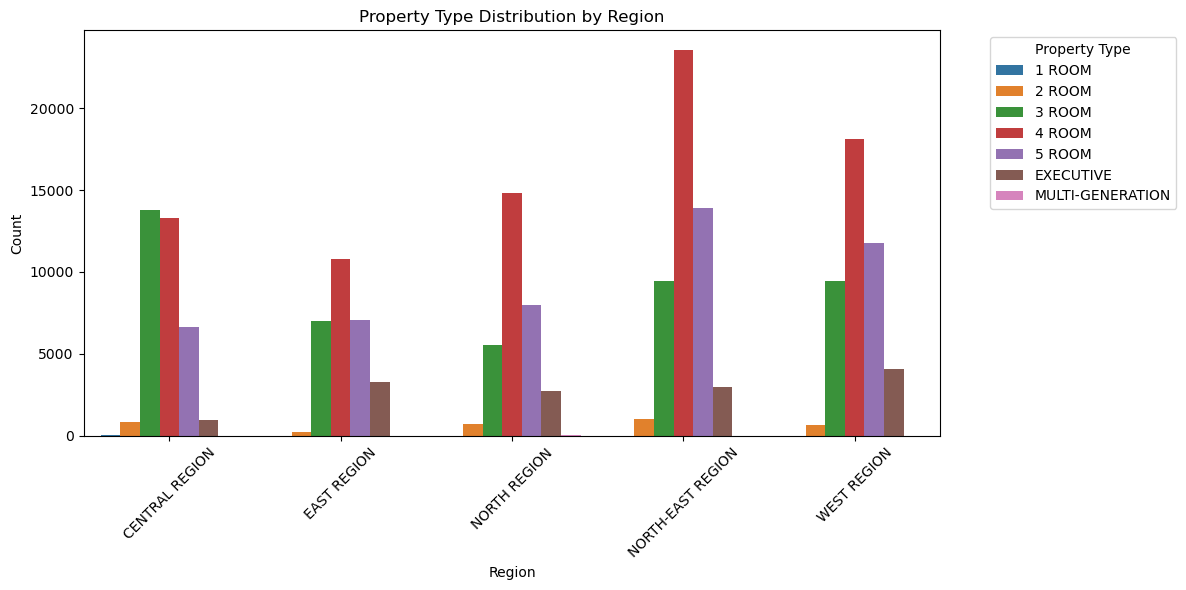

In [20]:
grouped_df = df_hdb_resale_price.groupby(['region', 'flat_type']).size().reset_index(name='count')

# Create a bar plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='count', hue='flat_type', data=grouped_df)
plt.title('Property Type Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Export the main dataset

In [21]:
export_path = r'E:\Documents\Personal Projects\Dashboard\HDB Resale Price\main_data.csv'
df_hdb_resale_price.to_csv(export_path, index = False)
print(f"Main data exported to '{export_path}'")

Main data exported to 'E:\Documents\Personal Projects\Dashboard\HDB Resale Price\main_data.csv'


### Showing the uniq address and exporting it
The dataset contains a total of 190,827 rows. To retrieve postal codes, latitude, and longitude, I will use the unique function to fetch only distinct values instead of extracting all of them.

In [64]:
# Get unique values of the 'address' column
unique_address = df_hdb_resale_price['address'].unique()

In [68]:
print(unique_address.shape)

(9581,)


In [65]:
# Create a DataFrame from the unique addresses
unique_address_df = pd.DataFrame(unique_address, columns=['unique_address'])

In [69]:
# Define the export path
export_path = r'E:\Documents\Personal Projects\Dashboard\HDB Resale Price\unique_add.csv'

In [70]:
# Export the DataFrame to a CSV file
unique_address_df.to_csv(export_path, index=False)

print(f"Unique addresses exported to '{export_path}'")

Unique addresses exported to 'E:\Documents\Personal Projects\Dashboard\HDB Resale Price\unique_addresses.csv'


## At this stage, I move to my Visual Studio environment to authenticate myself with OneMap in order to retrive the geolocation of my dataset